# 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비하기

In [1]:
import pandas as pd # 데이터 분석을 위한 라이브러리 pandas

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 데이터 불러오기 (read_csv() 함수는 csv 파일을 불러옴)
fish.head() # 데이터 확인 (head() 함수는 처음 5개의 데이터를 보여줌)

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [2]:
print(pd.unique(fish['Species'])) # Species 열의 고유한 값 출력 (unique() 함수는 고유한 값을 출력함)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 입력 데이터를 넘파이 배열로 만듦 (to_numpy() 함수는 넘파이 배열로 만듦)

In [4]:
print(fish_input[:5]) # fish_input의 처음 5개의 데이터 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy() # 타깃 데이터를 넘파이 배열로 만듦 (to_numpy() 함수는 넘파이 배열로 만듦)

In [6]:
from sklearn.model_selection import train_test_split # 사이킷런의 train_test_split() 함수를 임포트함 (train_test_split() 함수는 훈련 세트와 테스트 세트로 나눔)

train_input, test_input, train_target, test_target = train_test_split( # 훈련 세트와 테스트 세트로 나눔 (train_test_split() 함수는 훈련 세트와 테스트 세트로 나눔)
    fish_input, fish_target, random_state=42) # random_state 매개변수를 42로 지정함 (random_state 매개변수는 무작위로 섞기 전에 미리 섞는 역할을 수행함) 

In [7]:
from sklearn.preprocessing import StandardScaler # 사이킷런의 StandardScaler 클래스를 임포트함 (StandardScaler 클래스는 특성을 표준화함)

ss = StandardScaler() # StandardScaler 클래스 객체를 만듦 (StandardScaler 클래스 객체는 표준화를 수행함)
ss.fit(train_input) # 훈련 세트의 통계값으로 각 특성의 스케일을 조정함 (fit() 메서드는 훈련 세트의 통계값을 저장함)
train_scaled = ss.transform(train_input) # 훈련 세트를 표준화함 (transform() 메서드는 훈련 세트와 테스트 세트를 표준화함)
test_scaled = ss.transform(test_input) # 테스트 세트를 표준화함 (transform() 메서드는 훈련 세트와 테스트 세트를 표준화함)

### k-최근접 이웃 분류기의 확률 예측

In [8]:
from sklearn.neighbors import KNeighborsClassifier # 사이킷런의 KNeighborsClassifier 클래스를 임포트함 (KNeighborsClassifier 클래스는 k-최근접 이웃 분류 모델을 훈련함)

kn = KNeighborsClassifier(n_neighbors=3) # KNeighborsClassifier 클래스 객체를 만듦 (KNeighborsClassifier 클래스 객체는 기본값이 5이므로 n_neighbors 매개변수를 3으로 지정함)
kn.fit(train_scaled, train_target) # k-최근접 이웃 분류 모델을 훈련함 (fit() 메서드는 k-최근접 이웃 분류 모델을 훈련함)

print(kn.score(train_scaled, train_target)) # 훈련 세트의 정확도를 계산함 (score() 메서드는 훈련 세트의 정확도를 계산함)
print(kn.score(test_scaled, test_target)) # 테스트 세트의 정확도를 계산함 (score() 메서드는 테스트 세트의 정확도를 계산함)

0.8907563025210085
0.85


In [9]:
print(kn.classes_) # kn 객체의 classes_ 속성을 출력함 (classes_ 속성은 타깃값의 고유한 값 배열을 담음)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(kn.predict(test_scaled[:5])) # 테스트 세트에 있는 처음 5개의 샘플에 대한 예측을 출력함 (predict() 메서드는 테스트 세트에 있는 샘플에 대한 예측을 출력함)

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
import numpy as np # 넘파이를 임포트함 (넘파이는 수치 계산을 위한 라이브러리임)

proba = kn.predict_proba(test_scaled[:5]) # 테스트 세트에 있는 처음 5개의 샘플에 대한 예측 확률을 출력함 (predict_proba() 메서드는 테스트 세트에 있는 샘플에 대한 예측 확률을 출력함)
print(np.round(proba, decimals=4)) # 테스트 세트에 있는 처음 5개의 샘플에 대한 예측 확률을 출력함 (round() 함수는 소수점 아래 4자리까지만 출력함)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [12]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # kneighbors() 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환함
print(train_target[indexes]) # 이웃 샘플의 타깃값을 출력함

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

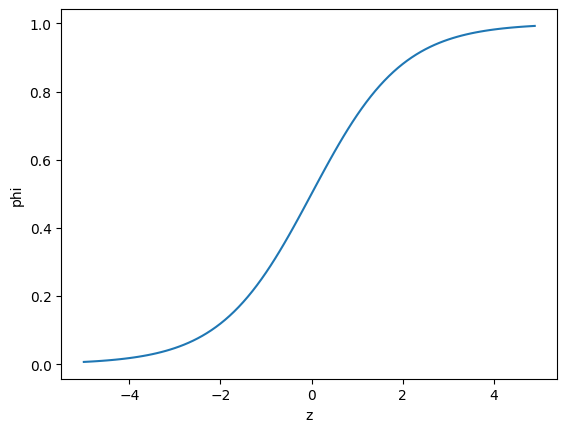

In [13]:
import numpy as np # 넘파이를 임포트함 (넘파이는 수치 계산을 위한 라이브러리임)
import matplotlib.pyplot as plt # 맷플롯립의 pyplot 함수를 plt로 줄여서 사용함 (맷플롯립은 그래프를 그리는 라이브러리임)

z = np.arange(-5, 5, 0.1) # -5에서 5까지 0.1 간격으로 넘파이 배열을 만듦 (arange() 함수는 넘파이 배열을 만듦)
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수를 만듦 (exp() 함수는 자연 상수 e의 지수 함수를 계산함)

plt.plot(z, phi) # z 배열의 시그모이드 함수를 그림 (plot() 함수는 그래프를 그림)
plt.xlabel('z') # x축을 레이블함 
plt.ylabel('phi') # y축을 레이블함  
plt.show() # 그래프를 출력함 (show() 함수는 그래프를 출력함)

### 로지스틱 회귀로 이진 분류 수행하기

In [14]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E']) # 넘파이 배열을 만듦 (넘파이 배열은 배열에 있는 모든 원소가 같은 자료형임) 
print(char_arr[[True, False, True, False, False]]) # 불리언 인덱싱을 사용함 (불리언 인덱싱은 배열에서 True에 해당하는 원소만 골라냄) 

['A' 'C']


In [15]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 도미와 빙어를 골라냄 (불리언 연산자 |는 파이프라인 기호임) 
train_bream_smelt = train_scaled[bream_smelt_indexes] # train_bream_smelt : 도미와 빙어 행만 골라냄 (불리언 인덱싱은 배열에서 True에 해당하는 원소만 골라냄)
target_bream_smelt = train_target[bream_smelt_indexes] # target_bream_smelt : 도미와 빙어 행만 골라냄 (불리언 인덱싱은 배열에서 True에 해당하는 원소만 골라냄)

In [16]:
from sklearn.linear_model import LogisticRegression # 사이킷런의 LogisticRegression 클래스를 임포트함 (LogisticRegression 클래스는 로지스틱 회귀 모델을 훈련함)

lr = LogisticRegression() # LogisticRegression 클래스 객체를 만듦 (LogisticRegression 클래스 객체는 기본값이 100이므로 max_iter 매개변수를 10000으로 지정함)
lr.fit(train_bream_smelt, target_bream_smelt) # 로지스틱 회귀 모델을 훈련함 (fit() 메서드는 로지스틱 회귀 모델을 훈련함)

LogisticRegression()

In [17]:
print(lr.predict(train_bream_smelt[:5])) # 처음 5개 샘플에 대한 예측을 출력함 (predict() 메서드는 처음 5개 샘플에 대한 예측을 출력함)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [18]:
print(lr.predict_proba(train_bream_smelt[:5])) # 처음 5개 샘플에 대한 예측 확률을 출력함 (predict_proba() 메서드는 처음 5개 샘플에 대한 예측 확률을 출력함)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [19]:
print(lr.classes_) # lr 객체의 classes_ 속성을 출력함 (classes_ 속성은 타깃값의 고유한 값 배열을 담음)

['Bream' 'Smelt']


In [20]:
print(lr.coef_, lr.intercept_) # lr 객체의 coef_ 속성과 intercept_ 속성을 출력함 (coef_ 속성은 가중치를 담고 있고 intercept_ 속성은 절편을 담고 있음)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [21]:
decisions = lr.decision_function(train_bream_smelt[:5]) # 처음 5개 샘플에 대한 z값을 출력함 (decision_function() 메서드는 처음 5개 샘플에 대한 z값을 출력함)
print(decisions) # 처음 5개 샘플에 대한 z값을 출력함

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [22]:
from scipy.special import expit # scipy.special의 expit() 함수를 임포트함 (expit() 함수는 시그모이드 함수를 계산함)

print(expit(decisions)) # 처음 5개 샘플에 대한 시그모이드 함수 출력함 (expit() 함수는 시그모이드 함수를 계산함)

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [23]:
lr = LogisticRegression(C=20, max_iter=1000) # LogisticRegression 클래스 객체를 만듦 (LogisticRegression 클래스 객체는 기본값이 100이므로 max_iter 매개변수를 10000으로 지정함)
lr.fit(train_scaled, train_target) # 로지스틱 회귀 모델을 훈련함 (fit() 메서드는 로지스틱 회귀 모델을 훈련함)

print(lr.score(train_scaled, train_target)) # 훈련 세트의 점수를 출력함 (score() 메서드는 훈련 세트의 점수를 출력함)
print(lr.score(test_scaled, test_target)) # 테스트 세트의 점수를 출력함 (score() 메서드는 테스트 세트의 점수를 출력함)

0.9327731092436975
0.925


In [24]:
print(lr.predict(test_scaled[:5])) # 처음 5개 샘플에 대한 예측을 출력함 (predict() 메서드는 처음 5개 샘플에 대한 예측을 출력함)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [25]:
proba = lr.predict_proba(test_scaled[:5]) # 처음 5개 샘플에 대한 예측 확률을 출력함 (predict_proba() 메서드는 처음 5개 샘플에 대한 예측 확률을 출력함)
print(np.round(proba, decimals=3)) # 처음 5개 샘플에 대한 예측 확률을 출력함 (np.round() 함수는 소수점 아래 자릿수를 지정함)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [26]:
print(lr.classes_) # lr 객체의 classes_ 속성을 출력함 (classes_ 속성은 타깃값의 고유한 값 배열을 담음)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [27]:
print(lr.coef_.shape, lr.intercept_.shape) # lr 객체의 coef_ 속성과 intercept_ 속성을 출력함 (coef_ 속성은 가중치를 담고 있고 intercept_ 속성은 절편을 담고 있음)

(7, 5) (7,)


In [28]:
decision = lr.decision_function(test_scaled[:5]) # 처음 5개 샘플에 대한 z값을 출력함 (decision_function() 메서드는 처음 5개 샘플에 대한 z값을 출력함)
print(np.round(decision, decimals=2)) # 처음 5개 샘플에 대한 z값을 출력함 (np.round() 함수는 소수점 아래 자릿수를 지정함)

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [29]:
from scipy.special import softmax # scipy.special의 softmax() 함수를 임포트함 (softmax() 함수는 소프트맥스 함수를 계산함)

proba = softmax(decision, axis=1) # 처음 5개 샘플에 대한 소프트맥스 함수 출력함 (softmax() 함수는 소프트맥스 함수를 계산함)
print(np.round(proba, decimals=3)) # 처음 5개 샘플에 대한 소프트맥스 함수 출력함 (np.round() 함수는 소수점 아래 자릿수를 지정함)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
